# Pymaceuticals Inc.
---

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_result_df = pd.merge(study_results, mouse_metadata,  on="Mouse ID")

# Display the data table for preview
merge_result_df.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
len(merge_result_df["Mouse ID"].unique())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = merge_result_df[merge_result_df.duplicated(subset= ["Mouse ID","Timepoint"], keep = "first")]

duplicate_mouse_id["Mouse ID"].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
only_g989_df = merge_result_df.loc[merge_result_df["Mouse ID"] == "g989", :]
only_g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_No_Dup_df = merge_result_df.loc[merge_result_df["Mouse ID"] != "g989", :]
Clean_No_Dup_df = Clean_No_Dup_df.drop_duplicates()

# Get the dataframe with clean and non-duplicated data
Clean_No_Dup_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [10]:
# Checking the number of mice in the clean DataFrame.
len(Clean_No_Dup_df["Mouse ID"].unique())

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_df = Clean_No_Dup_df.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_tumor_mean = drug_regimen_df["Tumor Volume (mm3)"].mean()
drug_tumor_median = drug_regimen_df["Tumor Volume (mm3)"].median()
drug_tumor_variance = drug_regimen_df["Tumor Volume (mm3)"].var()
drug_tumor_stddev = drug_regimen_df["Tumor Volume (mm3)"].std()
drug_tumor_sem = drug_regimen_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
drug_regimen_stat_df = pd.DataFrame({"Mean Tumor Volume": drug_tumor_mean,
                                    "Median Tumor Volume": drug_tumor_median,
                                     "Tumor Volume Variance": drug_tumor_variance,
                                     "Tumor Volume Std. Dev.": drug_tumor_stddev,
                                     "Tumor Volume Std. Err.": drug_tumor_sem})
#Displaying the Panda Data Frame
drug_regimen_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_df.agg( {"Tumor Volume (mm3)": ["mean", "median", "var", "std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

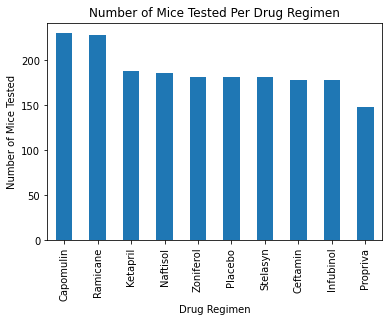

In [99]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_mice_no = drug_regimen_df["Mouse ID"].count()

drug_mice_no = drug_mice_no.sort_values(ascending=False)

drug_mice_no.plot(kind="bar")

# Set a title for the chart
plt.title("Number of Mice Tested Per Drug Regimen")
plt.ylabel("Number of Mice Tested")

# Displaying the bar graph
plt.show()


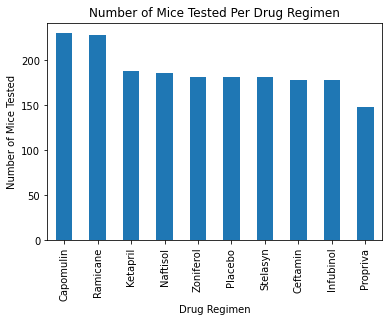

In [100]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_mice_no = drug_regimen_df["Timepoint"].count()

drug_mice_no = drug_mice_no.sort_values(ascending=False)

drug_mice_no.plot(kind="bar")

# Set a title for the chart
plt.title("Number of Mice Tested Per Drug Regimen")
plt.ylabel("Number of Mice Tested")

# Displaying the bar graph
plt.show()

In [15]:
# Prepare data for computing total number of Male and Female Mice

Clean_No_Dup_df["Sex"].unique()

only_male_df = Clean_No_Dup_df.loc[merge_result_df["Sex"] == "Male", :]
only_female_df = Clean_No_Dup_df.loc[merge_result_df["Sex"] == "Female", :]

#Get counts of Male and Female Mice
male_count = len(only_male_df["Mouse ID"].unique())
female_count = len(only_female_df["Mouse ID"].unique())


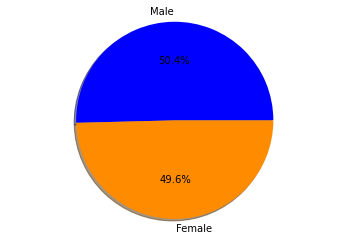

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [male_count, female_count]

# The colors of each section of the pie chart
colors = ["blue", "darkorange"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=360)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

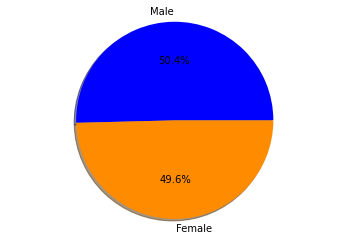

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [male_count, female_count]

# The colors of each section of the pie chart
colors = ["blue", "darkorange"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=360)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [118]:
tumor_subset_df = Clean_No_Dup_df.loc[(merge_result_df["Drug Regimen"] == "Ramicane") | (merge_result_df["Drug Regimen"] == "Capomulin") | (merge_result_df["Drug Regimen"] == "Infubinol") | (merge_result_df["Drug Regimen"] == "Ceftamin"),  :]

# Put treatments into a list for for loop (and later for plot labels)
treatments = tumor_subset_df["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume =[]
drug_name = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    tumor = tumor_subset_df.loc[tumor_subset_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    
# add subset 
    tumor_volume.append(tumor)
    drug_name.append(drug)
# Determine outliers using upper and lower bounds
    quartiles=tumor.quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    median = round(quartiles[0.5],2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    outliers = round((tumor.loc[(tumor >= upper_bound) | (tumor <= lower_bound)]),2)
    print(f"{drug}'s quartiles, median, upper and lower bounds and outliers:")
    print(f"The lower quartile of {drug} Regimen is: {lowerq}")
    print(f"The upper quartile of {drug} Regimen is: {upperq}")
    print(f"The interquartile range of {drug} Regimen is: {iqr}")
    print(f"The the median of {drug} Regimen is: {median} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"{drug}'s potential outliers: {outliers}.")
    print("-----------------------------------------------")


Capomulin's quartiles, median, upper and lower bounds and outliers:
The lower quartile of Capomulin Regimen is: 37.69
The upper quartile of Capomulin Regimen is: 45.0
The interquartile range of Capomulin Regimen is: 7.31
The the median of Capomulin Regimen is: 41.56 
Values below 26.72 could be outliers.
Values above 55.96 could be outliers.
Capomulin's potential outliers: 1699    25.47
1700    23.34
Name: Tumor Volume (mm3), dtype: float64.
-----------------------------------------------
Infubinol's quartiles, median, upper and lower bounds and outliers:
The lower quartile of Infubinol Regimen is: 47.31
The upper quartile of Infubinol Regimen is: 57.31
The interquartile range of Infubinol Regimen is: 10.0
The the median of Infubinol Regimen is: 51.82 
Values below 32.31 could be outliers.
Values above 72.31 could be outliers.
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
-----------------------------------------------
Ramicane's quartiles, media

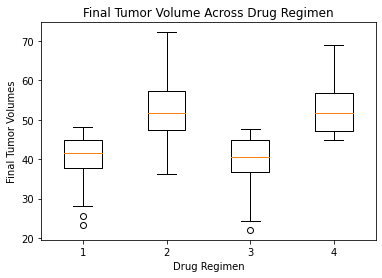

In [128]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Across Drug Regimen')
ax1.set_ylabel('Final Tumor Volumes')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_volume)
plt.show()

## Line and Scatter Plots

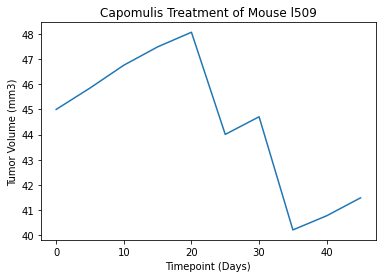

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_tumor_subset_df = tumor_subset_df.loc[tumor_subset_df["Mouse ID"]=='l509',:]

# Graph Title
plt.title("Capomulis Treatment of Mouse l509")
# Plot X & Y Labels
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Plot the chart
plt.plot(mouse_tumor_subset_df["Timepoint"], mouse_tumor_subset_df["Tumor Volume (mm3)"])
plt.show()

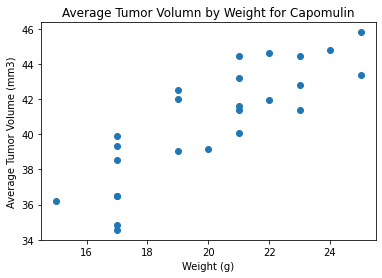

In [89]:
# Isolate data for Capomulin a separate Data Frame
capomulin_df = tumor_subset_df.loc[tumor_subset_df["Drug Regimen"] == "Capomulin",:]

capomulin_by_mouse_df = capomulin_df.groupby(["Mouse ID"])

capomulin_avg_tumor_vol = capomulin_by_mouse_df["Tumor Volume (mm3)"].mean()
capomulin_mouse_id = capomulin_by_mouse_df["Mouse ID"].unique()
capomulin_weight = capomulin_by_mouse_df["Weight (g)"].mean()

capomulin_mouse_tumor_df = pd.DataFrame({"Mouse ID": capomulin_mouse_id,
                              "Weight": capomulin_weight,
                              "Avg Tumor Vol":capomulin_avg_tumor_vol})

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.title("Average Tumor Volumn by Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.scatter(capomulin_mouse_tumor_df["Weight"], capomulin_mouse_tumor_df["Avg Tumor Vol"], marker="o")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


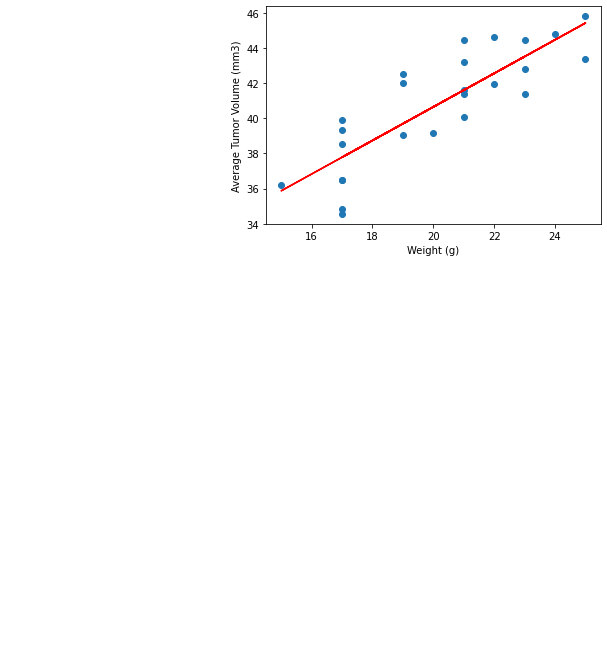

In [98]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin_mouse_tumor_df["Weight"]
y_values = capomulin_mouse_tumor_df["Avg Tumor Vol"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()